In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime
import FinanceDataReader as fdr
#import warnings
#import os
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot


In [2]:
# 삼성전자 주식코드: 005930
STOCK_CODE = 'ks200'

In [3]:
stock = fdr.DataReader(STOCK_CODE)

In [4]:
data = stock[-1500:]

In [5]:
data.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [6]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [7]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [8]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1304, 50, 1), (145, 50, 1))

In [9]:
#lstm1 = LSTM(50, return_sequences=True, input_shape=(50, 1))
#lstm2 = model.add(LSTM(64, return_sequences=False))

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
131/131 [==============================] - 21s 32ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 2/20
131/131 [==============================] - 3s 24ms/step - loss: 4.4082e-04 - val_loss: 3.4392e-04
Epoch 3/20
131/131 [==============================] - 3s 26ms/step - loss: 2.3099e-04 - val_loss: 4.2700e-04
Epoch 4/20
131/131 [==============================] - 3s 24ms/step - loss: 2.0730e-04 - val_loss: 5.9755e-04
Epoch 5/20
131/131 [==============================] - 3s 25ms/step - loss: 1.5757e-04 - val_loss: 3.2776e-04
Epoch 6/20
131/131 [==============================] - 3s 25ms/step - loss: 1.2952e-04 - val_loss: 2.5902e-04
Epoch 7/20
131/131 [==============================] - 3s 25ms/step - loss: 1.0963e-04 - val_loss: 2.6758e-04
Epoch 8/20
131/131 [==============================] - 3s 24ms/step - loss: 1.1233e-04 - val_loss: 4.8743e-04
Epoch 9/20
131/131 [==============================] - 3s 25ms/step - loss: 9.8818e-05 - val_loss: 4.4242e-04
Epoch 10/20
131/131 [=====

In [14]:
pred = model.predict(x_test)

In [16]:
y_test[-1:]

array([0.01225725])

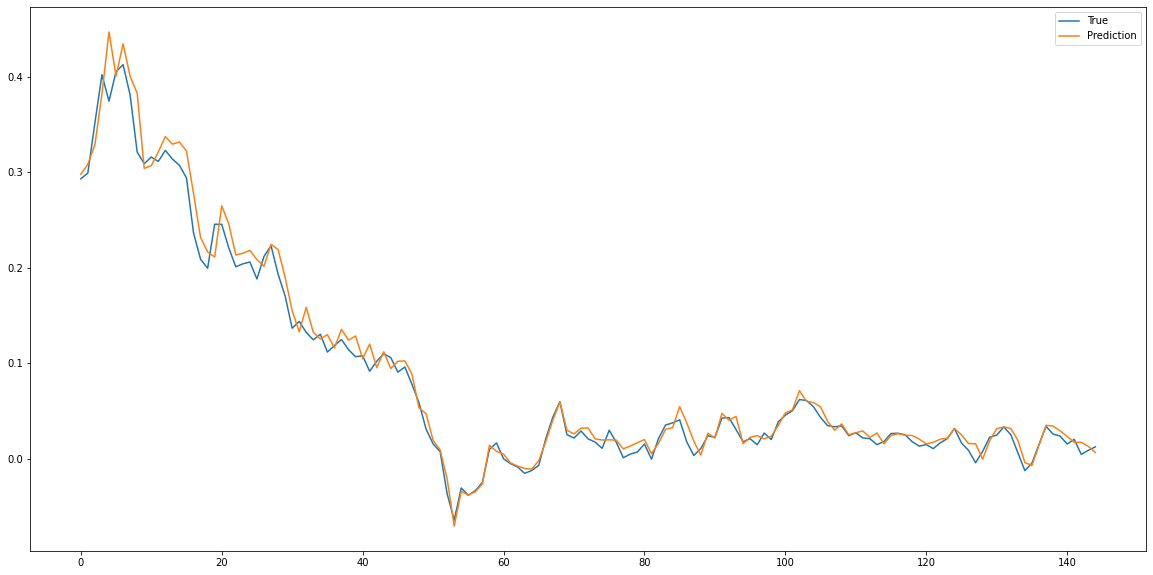

In [12]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()